In [ ]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install --upgrade pandas numpy


Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 11.6/11.6 MB 285.9 kB/s eta 0:00:00
     ------------------------------------- 346.6/346.6 kB 55.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
conda update pandas numpy


Solving environment: ...working... 

Updating pandas is constricted by 

anaconda -> requires pandas==1.4.4=py39hd77b12b_0

If you are sure you want an update of your package either try `conda update --all` or install a specific version of the package you want using `conda install <pkg>=<version>`



Updating numpy is constricted by 

anaconda -> requires numpy==1.21.5=py39h7a0a035_3

If you are sure you want an update of your package either try `conda update --all` or install a specific version of the package you want using `conda install <pkg>=<version>`

done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - numpy
    - pandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-pack-0.7.1           |   py39haa95532_0          73 KB
    pyjwt-2.8.0                |   py39haa95532_0          75 KB
    ------------------------------



==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 24.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




In [ ]:
data = pd.read_csv('C:/Users/Hp/Desktop/thesis/uci-secom/uci-secom.csv')
del data['Product ID']
del data['Type']
data.head(5)

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [ ]:
data.shape

(10000, 12)

In [ ]:
features = ['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'RNF','OSF','PWF']

label = ['Machine failure']
X = data[features]
y = data[label]


C:\Users\Hp\AppData\Local\Temp\ipykernel_16276\2644968305.py:23: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  legend = plt.legend(legend_labels, loc='best', bbox_to_anchor=(1, 0.5), title='Categories', labels=legend_colors)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


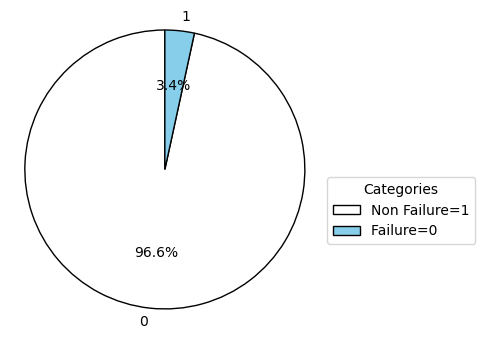

In [ ]:
import matplotlib.pyplot as plt

# Select the categorical feature for this example
categorical_feature = 'Machine failure'

# Calculate the counts for each category in the categorical feature
category_counts = data[categorical_feature].value_counts()

# Define custom colors for the slices based on percentages
total_count = category_counts.sum()
percentages = category_counts / total_count
colors = ['white' if p > 0.8 else 'skyblue' if p == 0.034 else 'skyblue' for p in percentages]

# Create a pie chart with custom colors and black boundaries
plt.figure(figsize=(4, 4))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
#plt.title(f'Distribution of {categorical_feature}')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Create a legend with custom color labels and white text color
legend_labels = ['Non Failure=1', 'Failure=0 ']  # Replace with your own category labels
legend_colors = ['Non Failure=1', 'Failure=0 ']
legend = plt.legend(legend_labels, loc='best', bbox_to_anchor=(1, 0.5), title='Categories', labels=legend_colors)

# Set the label text color to white
for text in legend.get_texts():
    text.set_color('black')
plt.savefig('ActaldataRepresentation.eps', format='eps', bbox_inches='tight')
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_16276\2836174198.py:23: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  legend = plt.legend(legend_labels, loc='best', bbox_to_anchor=(1, 0.5), title='Categories', labels=legend_colors)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


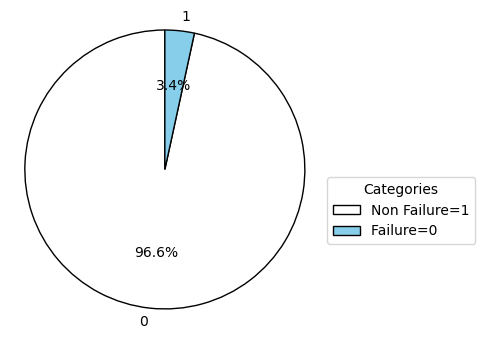

In [ ]:
import matplotlib.pyplot as plt

# Select the categorical feature for this example
categorical_feature = 'Machine failure'

# Calculate the counts for each category in the categorical feature
category_counts = data[categorical_feature].value_counts()

# Define custom colors for the slices based on percentages
total_count = category_counts.sum()
percentages = category_counts / total_count
colors = ['white' if p > 0.8 else 'skyblue' if p == 0.034 else 'skyblue' for p in percentages]

# Create a pie chart with custom colors and black boundaries
plt.figure(figsize=(4, 4))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
#plt.title(f'Distribution of {categorical_feature}')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Create a legend with custom color labels and white text color
legend_labels = ['Non Failure=1', 'Failure=0 ']  # Replace with your own category labels
legend_colors = ['Non Failure=1', 'Failure=0 ']
legend = plt.legend(legend_labels, loc='best', bbox_to_anchor=(1, 0.5), title='Categories', labels=legend_colors)

# Set the label text color to white
for text in legend.get_texts():
    text.set_color('black')
plt.savefig('precision_recall_curves.eps', format='eps', bbox_inches='tight')
plt.show()


In [ ]:
%matplotlib inline
import os
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense

from numpy.random import randn
from matplotlib import pyplot

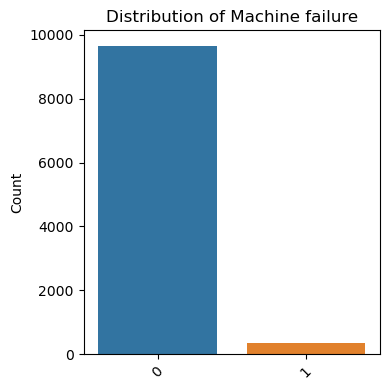

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the categorical features for this example
categorical_features = ['Machine failure']

# Create a larger plot
plt.figure(figsize=(4, 4))

for feature in categorical_features:
    sns.countplot(x=feature, data=data)
    plt.title(f'Distribution of {feature}')

    # Rotate x-axis labels for better readability (if needed)
    plt.xticks(rotation=45)

    plt.xlabel("")  # Remove x-axis label (if not needed)
    plt.ylabel("Count")  # Add y-axis label (if needed)

    plt.tight_layout()  # Ensure tight layout to prevent clipping of labels

    plt.show()


In [ ]:
print (y)

      Machine failure
0                   0
1                   0
2                   0
3                   0
4                   0
...               ...
9995                0
9996                0
9997                0
9998                0
9999                0

[10000 rows x 1 columns]


In [ ]:

data = data.astype({'Air temperature [K]':'int64'})
data = data.astype({'Torque [Nm]':'int64'})
data = data.astype({'Process temperature [K]':'int64'})


In [ ]:


import pandas as pd
from imblearn.over_sampling import SMOTE

features = ['UDI','Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'RNF','OSF','PWF']

label = ['Machine failure']
X = data[features]
y = data[label]

# Import train_test_split to split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (adjust the test_size as needed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
# Apply SMOTE to the training set with a 20-80 split
smote = SMOTE(sampling_strategy=0.25, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Combine X_train_resampled and y_train_resampled into a single DataFrame
resampled_data = pd.concat([pd.DataFrame(X_train_resampled, columns=X_train.columns), pd.DataFrame(y_train_resampled, columns=['Machine failure'])], axis=1)

# Check the class distribution before and after SMOTE
print("Class Distribution Before SMOTE:")
print(y_train.value_counts().to_frame())

print("\nClass Distribution After SMOTE:")
print(resampled_data['Machine failure'].value_counts().to_frame())

Class Distribution Before SMOTE:
                    0
Machine failure      
0                7722
1                 278

Class Distribution After SMOTE:
   Machine failure
0             7722
1             1930


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets (adjust the test_size as needed)
# Assuming your dataset has a 'Machine failure' column as the target (label) and the rest are features
features = ['UDI', 'Air temperature [K]', 'Process temperature [K]',
            'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'RNF', 'OSF', 'PWF']
label = ['Machine failure']

X = resampled_data[features].values
y = resampled_data[label].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier on the training data
dt=dt_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9456240290005179

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1547
           1       0.86      0.87      0.86       384

    accuracy                           0.95      1931
   macro avg       0.91      0.92      0.91      1931
weighted avg       0.95      0.95      0.95      1931



C:\Users\Hp\AppData\Local\Temp\ipykernel_16276\1232903159.py:23: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  legend = plt.legend(legend_labels, loc='best', bbox_to_anchor=(1, 0.5), title='Categories', labels=legend_colors)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


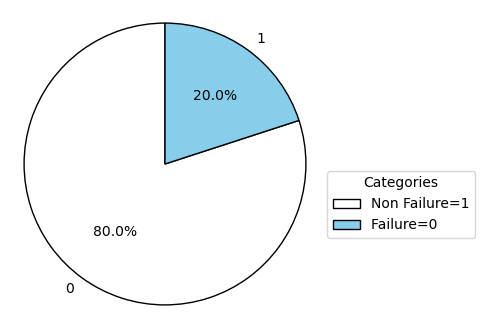

In [ ]:
import matplotlib.pyplot as plt

# Select the categorical feature for this example
categorical_feature = 'Machine failure'

# Calculate the counts for each category in the categorical feature
category_counts = resampled_data[categorical_feature].value_counts()

# Define custom colors for the slices based on percentages
total_count = category_counts.sum()
percentages = category_counts / total_count
colors = ['skyblue' if label == 'Failure=0 ' else 'white' for label in legend_labels]

# Create a pie chart with custom colors and black boundaries
plt.figure(figsize=(4, 4))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'})
#plt.title(f'Distribution of {categorical_feature}')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

# Create a legend with custom color labels and white text color
legend_labels = ['Non Failure=1', 'Failure=0 ']  # Replace with your own category labels
legend_colors = ['Non Failure=1', 'Failure=0 ']
legend = plt.legend(legend_labels, loc='best', bbox_to_anchor=(1, 0.5), title='Categories', labels=legend_colors)

# Set the label text color to white
for text in legend.get_texts():
    text.set_color('black')
plt.savefig('SDR.eps', format='eps', bbox_inches='tight')
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9456240290005179
Precision: 0.8604651162790697
Recall: 0.8671875
F1 Score: 0.8638132295719845


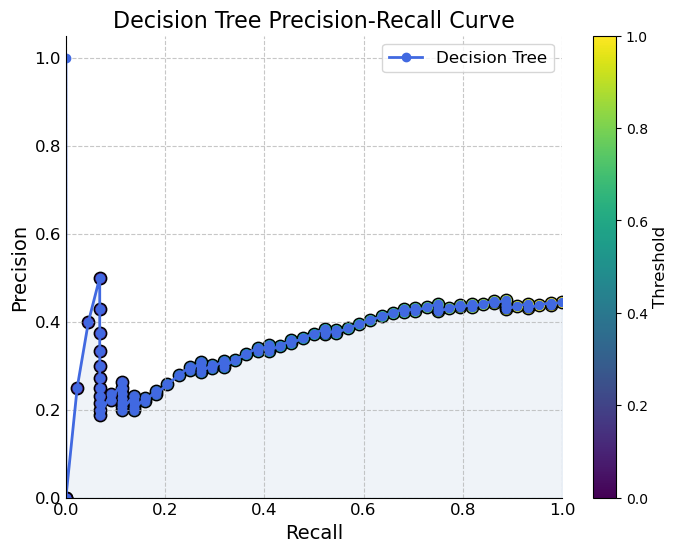

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Generate example data (you should replace this with your actual data)
y_test = np.random.randint(2, size=100)
y_pred = np.random.rand(100)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Set up a custom color palette
color_palette = plt.cm.get_cmap('viridis_r', len(thresholds))

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='o', color='royalblue', label='Decision Tree', linewidth=2)
plt.fill_between(recall, precision, color='lightsteelblue', alpha=0.2)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Decision Tree Precision-Recall Curve', fontsize=16)
plt.legend(fontsize=12)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().tick_params(axis='both', which='both', length=0)

# Use custom markers and color palette
for i, t in enumerate(thresholds):
    plt.scatter(recall[i], precision[i], c=[color_palette(i)], s=80, edgecolors='k')

# Add colorbar to indicate the threshold variations
cbar = plt.colorbar()
cbar.set_label('Threshold', fontsize=12)

plt.show()


# SVM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
# Split the data into training and testing sets
# Assuming your dataset has a 'Machine failure' column as the target (label) and the rest are features
features = ['UDI', 'Air temperature [K]', 'Process temperature [K]',
            'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'RNF', 'OSF', 'PWF']
label = ['Machine failure']

X = resampled_data[features].values
y = resampled_data[label].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)

# Create and train the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9482133609528741


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9482133609528741
Precision: 0.9246376811594202
Recall: 0.811704834605598
F1 Score: 0.8644986449864498


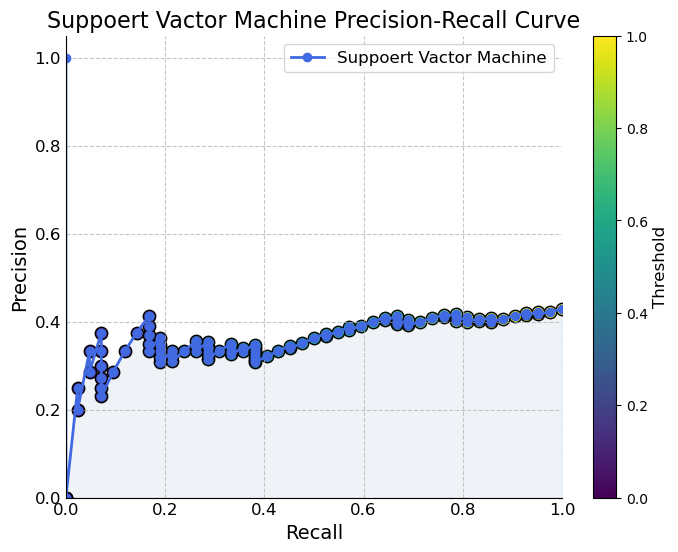

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Generate example data (you should replace this with your actual data)
y_test = np.random.randint(2, size=100)
y_pred = np.random.rand(100)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Set up a custom color palette
color_palette = plt.cm.get_cmap('viridis_r', len(thresholds))

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='o', color='royalblue', label='Suppoert Vactor Machine', linewidth=2)
plt.fill_between(recall, precision, color='lightsteelblue', alpha=0.2)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Suppoert Vactor Machine Precision-Recall Curve', fontsize=16)
plt.legend(fontsize=12)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().tick_params(axis='both', which='both', length=0)

# Use custom markers and color palette
for i, t in enumerate(thresholds):
    plt.scatter(recall[i], precision[i], c=[color_palette(i)], s=80, edgecolors='k')

# Add colorbar to indicate the threshold variations
cbar = plt.colorbar()
cbar.set_label('Threshold', fontsize=12)

plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1572
           1       0.87      0.77      0.82       359

    accuracy                           0.94      1931
   macro avg       0.91      0.87      0.89      1931
weighted avg       0.94      0.94      0.94      1931



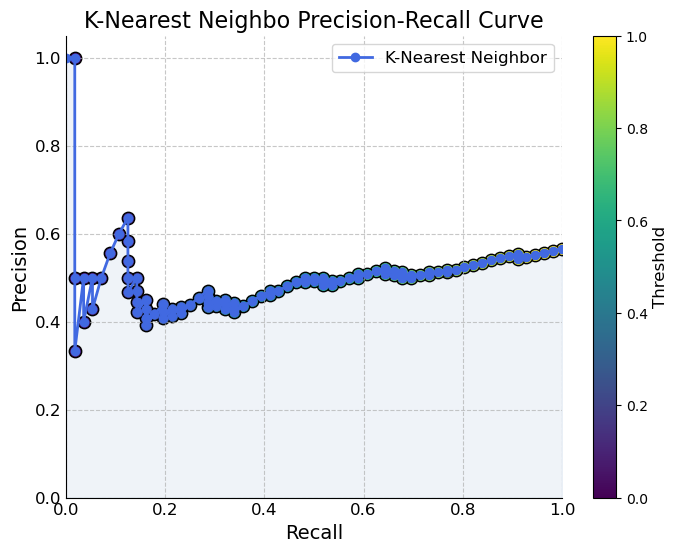

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Generate example data (you should replace this with your actual data)
y_test = np.random.randint(2, size=100)
y_pred = np.random.rand(100)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Set up a custom color palette
color_palette = plt.cm.get_cmap('viridis_r', len(thresholds))

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='o', color='royalblue', label='K-Nearest Neighbor', linewidth=2)
plt.fill_between(recall, precision, color='lightsteelblue', alpha=0.2)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('K-Nearest Neighbo Precision-Recall Curve', fontsize=16)
plt.legend(fontsize=12)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().tick_params(axis='both', which='both', length=0)

# Use custom markers and color palette
for i, t in enumerate(thresholds):
    plt.scatter(recall[i], precision[i], c=[color_palette(i)], s=80, edgecolors='k')

# Add colorbar to indicate the threshold variations
cbar = plt.colorbar()
cbar.set_label('Threshold', fontsize=12)

plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


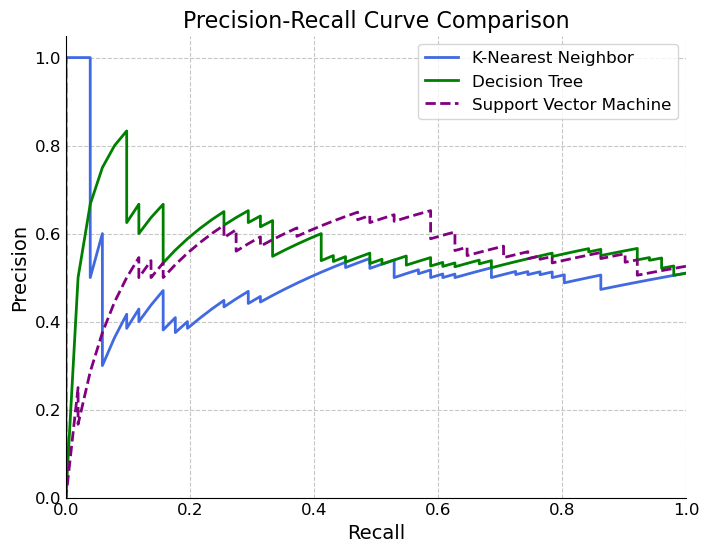

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Generate example data (you should replace this with your actual data)
y_test = np.random.randint(2, size=100)
y_pred_knn = np.random.rand(100)
y_pred_tree = np.random.rand(100)
y_pred_svm = np.random.rand(100)

precision_knn, recall_knn, thresholds_knn = precision_recall_curve(y_test, y_pred_knn)
precision_tree, recall_tree, thresholds_tree = precision_recall_curve(y_test, y_pred_tree)
precision_svm, recall_svm, thresholds_svm = precision_recall_curve(y_test, y_pred_svm)

# Set up a custom color palette
color_palette_knn = plt.cm.get_cmap('viridis_r', len(thresholds_knn))
color_palette_tree = plt.cm.get_cmap('plasma_r', len(thresholds_tree))
color_palette_svm = plt.cm.get_cmap('cividis_r', len(thresholds_svm))

plt.figure(figsize=(8, 6))

# Plot K-Nearest Neighbor precision-recall curve as a simple line
plt.plot(recall_knn, precision_knn, color='royalblue', label='K-Nearest Neighbor', linewidth=2)

# Plot Decision Tree precision-recall curve as a simple line
plt.plot(recall_tree, precision_tree, color='green', label='Decision Tree', linewidth=2)

# Plot SVM precision-recall curve as a dotted line
plt.plot(recall_svm, precision_svm, color='purple', linestyle='--', label='Support Vector Machine', linewidth=2)

plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve Comparison', fontsize=16)
plt.legend(fontsize=12)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().tick_params(axis='both', which='both', length=0)
plt.savefig('ResultswithSmote.eps', format='eps', bbox_inches='tight')

# Add colorbar to indicate the threshold variations (optional)
#cbar = plt.colorbar()
#cbar.set_label('Threshold', fontsize=12)

plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


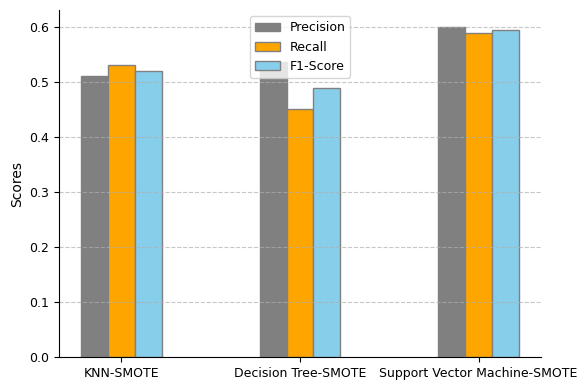

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score



# Calculate precision, recall, and F1-score for all three models
precision_knn = precision_score(y_test, y_pred_knn.round())
recall_knn = recall_score(y_test, y_pred_knn.round())
f1_knn = f1_score(y_test, y_pred_knn.round())

precision_tree = precision_score(y_test, y_pred_tree.round())
recall_tree = recall_score(y_test, y_pred_tree.round())
f1_tree = f1_score(y_test, y_pred_tree.round())

precision_svm = precision_score(y_test, y_pred_svm.round())
recall_svm = recall_score(y_test, y_pred_svm.round())
f1_svm = f1_score(y_test, y_pred_svm.round())

# Define models and corresponding metrics
models = ['KNN-SMOTE', 'Decision Tree-SMOTE', 'Support Vector Machine-SMOTE']
precision_scores = [precision_knn, precision_tree, precision_svm]
recall_scores = [recall_knn, recall_tree, recall_svm]
f1_scores = [f1_knn, f1_tree, f1_svm]

# Set width of bars
barWidth = 0.15

# Set position of bar on X axis
r1 = np.arange(len(models))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(6, 4))

# Make the plot
plt.bar(r1, precision_scores, color='grey', width=barWidth, edgecolor='grey', label='Precision')
plt.bar(r2, recall_scores, color='orange', width=barWidth, edgecolor='grey', label='Recall')
plt.bar(r3, f1_scores, color='skyblue', width=barWidth, edgecolor='grey', label='F1-Score')

# Add xticks on the middle of the group bars
#plt.xlabel('Models', fontsize=12)
plt.ylabel('Scores', fontsize=10)
#plt.title('Model Performance Comparison', fontsize=14)
plt.xticks([r + barWidth for r in range(len(models))], models, fontsize=9)
plt.yticks(fontsize=9)
plt.legend(fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('model_SMOTE.eps', format='eps', bbox_inches='tight')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Import pandas for data handling


# Replace 'your_data.csv' with the actual path to your data file
data = pd.read_csv('your_data.csv') # Load your dataset into a pandas DataFrame


# Select the categorical features for this example
categorical_features = ['Machine failure']

# Create a larger plot
plt.figure(figsize=(4, 4))

for feature in categorical_features:
    sns.countplot(x=feature, data=data)
    plt.title(f'Distribution of {feature}')

    # Rotate x-axis labels for better readability (if needed)
    plt.xticks(rotation=45)

    plt.xlabel("")  # Remove x-axis label (if not needed)
    plt.ylabel("Count")  # Add y-axis label (if needed)

    plt.tight_layout()  # Ensure tight layout to prevent clipping of labels

    plt.show()